In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input,Activation #Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping #ReduceLROnPlateau
from sqlalchemy import create_engine,text

In [3]:
 # Excel dosyasından okuma
garantiveriset=pd.read_excel("/Users/nilsuaksu/Downloads/GARAN.xlsx")

In [5]:
garantiveriset

,Tarih,Saat,Açılış,Yüksek,Düşük,Kapanış,Ortalama,Hacim,Lot
0,04.01.2010,00:00:00,4.494984,4.571495,4.428038,4.542803,4.487566,162271300,36160200
1,05.01.2010,00:00:00,4.542803,4.648005,4.494984,4.542803,4.583316,174219100,38011580
2,06.01.2010,00:00:00,4.542803,4.648005,4.494984,4.609750,4.569765,170954800,37409980
3,07.01.2010,00:00:00,4.571495,4.714951,4.542803,4.686260,4.623654,177397600,38367400
4,08.01.2010,00:00:00,4.714951,4.858408,4.648005,4.648005,4.733771,267541800,56517690
...,...,...,...,...,...,...,...,...,...
3633,05.07.2024,00:00:00,120.800000,122.600000,119.900000,121.200000,121.367200,2294684000,18906950
3634,08.07.2024,00:00:00,123.100000,125.500000,122.500000,123.800000,124.185400,2455827000,19775490
3635,09.07.2024,00:00:00,124.200000,125.700000,121.800000,122.700000,123.931300,2160347000,17431810
3636,10.07.2024,00:00:00,123.000000,124.700000,119.700000,123.300000,122.010100,2756984000,22596370


In [9]:
garantiveriset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3638 entries, 0 to 3637
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tarih     3638 non-null   object 
 1   Saat      3638 non-null   object 
 2   Açılış    3638 non-null   float64
 3   Yüksek    3638 non-null   float64
 4   Düşük     3638 non-null   float64
 5   Kapanış   3638 non-null   float64
 6   Ortalama  3638 non-null   float64
 7   Hacim     3638 non-null   int64  
 8   Lot       3638 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 255.9+ KB


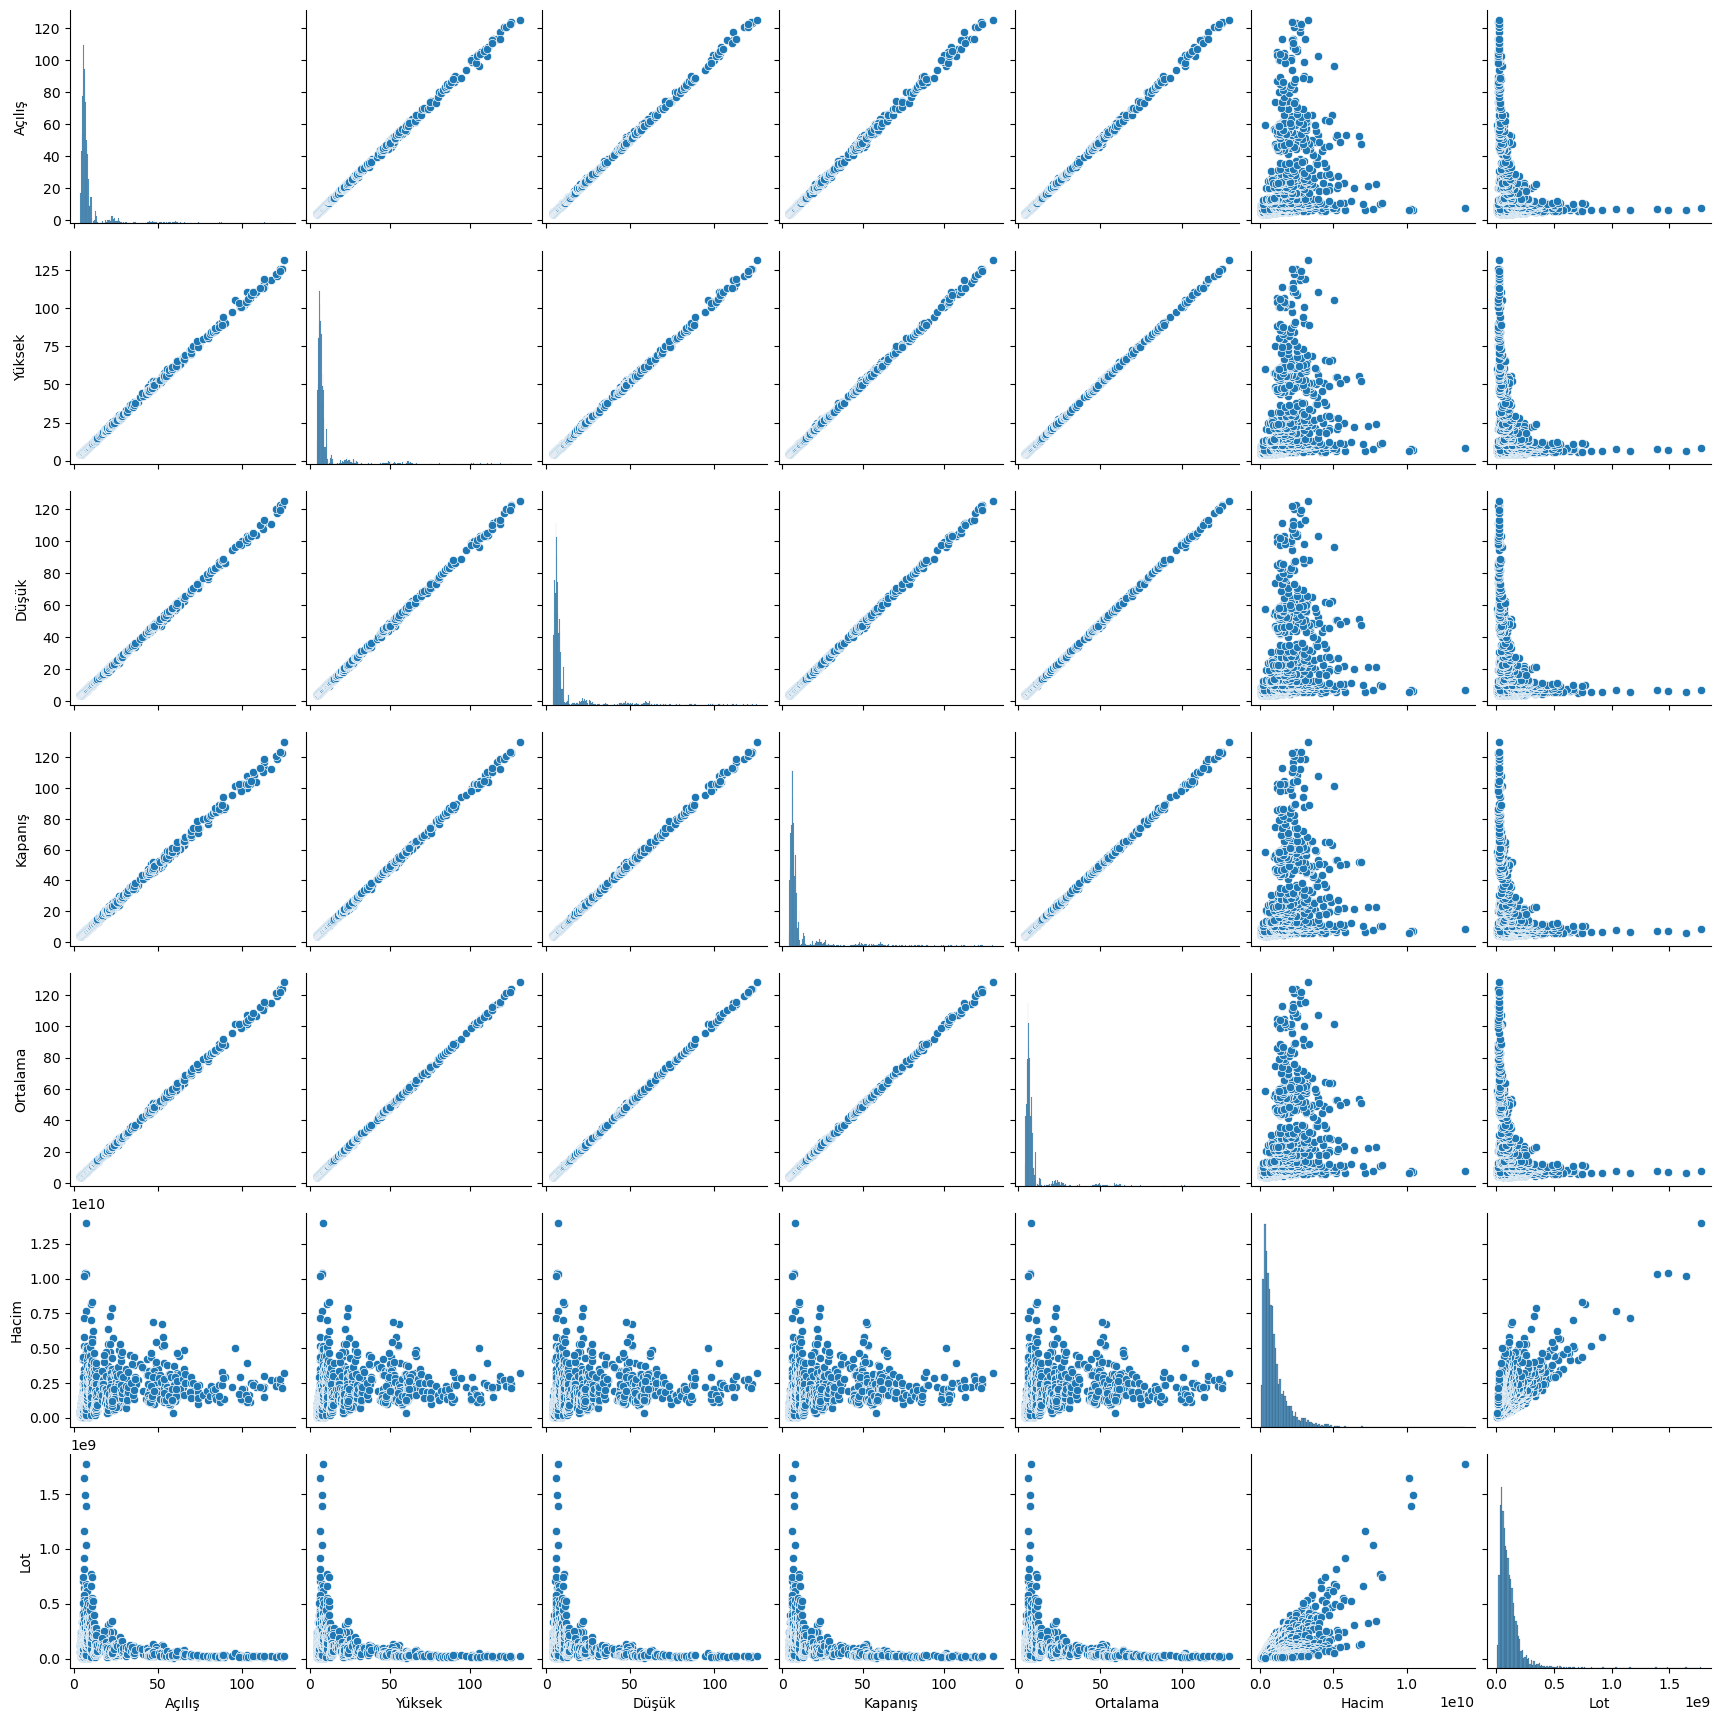

In [11]:
sbn.pairplot(garantiveriset)

In [17]:
# 'Tarih' sütununu datetime formatına çevirme ve ordinal değerlere dönüştürme
garantiveriset['Tarih'] = pd.to_datetime(garantiveriset['Tarih'], format='%d.%m.%Y')
garantiveriset['Tarih'] = garantiveriset['Tarih'].map(pd.Timestamp.toordinal)
#sisecamveriset =sisecamveriset.set_index('Tarih')
garantiveriset = garantiveriset.select_dtypes(include=['float64', 'int64'])

In [19]:
garantiveriset

,Tarih,Açılış,Yüksek,Düşük,Kapanış,Ortalama,Hacim,Lot
0,733776,4.494984,4.571495,4.428038,4.542803,4.487566,162271300,36160200
1,733777,4.542803,4.648005,4.494984,4.542803,4.583316,174219100,38011580
2,733778,4.542803,4.648005,4.494984,4.609750,4.569765,170954800,37409980
3,733779,4.571495,4.714951,4.542803,4.686260,4.623654,177397600,38367400
4,733780,4.714951,4.858408,4.648005,4.648005,4.733771,267541800,56517690
...,...,...,...,...,...,...,...,...
3633,739072,120.800000,122.600000,119.900000,121.200000,121.367200,2294684000,18906950
3634,739075,123.100000,125.500000,122.500000,123.800000,124.185400,2455827000,19775490
3635,739076,124.200000,125.700000,121.800000,122.700000,123.931300,2160347000,17431810
3636,739077,123.000000,124.700000,119.700000,123.300000,122.010100,2756984000,22596370


In [23]:
garantiveriset.describe()

,Tarih,Açılış,Yüksek,Düşük,Kapanış,Ortalama,Hacim,Lot
count,3638.000000,3638.000000,3638.000000,3638.000000,3638.000000,3638.000000,3.638000e+03,3.638000e+03
mean,736414.946399,11.666847,11.889999,11.474244,11.666919,11.688809,9.864561e+08,1.083966e+08
std,1528.402302,15.532093,15.914785,15.247332,15.576524,15.596523,9.942376e+08,1.006755e+08
min,733776.000000,4.074177,4.102869,3.911593,3.930720,4.023954,3.479856e+07,5.539716e+06
25%,735088.250000,5.788488,5.872170,5.719150,5.776533,5.791780,3.791270e+08,4.965853e+07
50%,736410.500000,6.732912,6.818986,6.637274,6.732912,6.740501,6.940688e+08,8.569220e+07
75%,737738.750000,8.463960,8.569161,8.358757,8.461569,8.465863,1.196324e+09,1.366998e+08
max,739078.000000,125.500000,131.400000,125.000000,130.200000,128.178300,1.398744e+10,1.774212e+09


In [27]:
garantiveriset.isnull().sum()

Tarih       0
Açılış      0
Yüksek      0
Düşük       0
Kapanış     0
Ortalama    0
Hacim       0
Lot         0
dtype: int64

In [31]:
garantiveriset = garantiveriset.dropna()

<Axes: xlabel='Kapanış', ylabel='Count'>

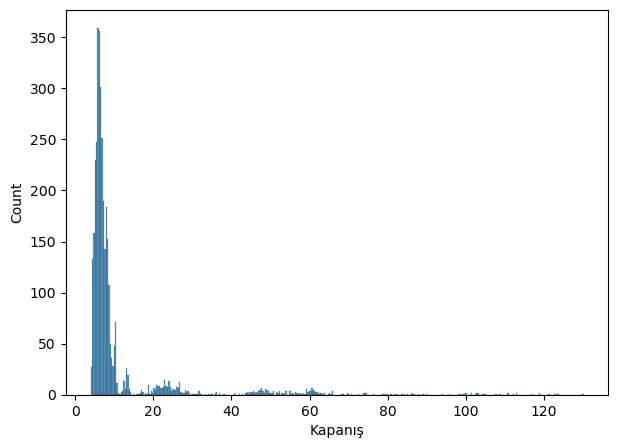

In [35]:
plt.figure(figsize=(7,5))
sbn.histplot(garantiveriset["Kapanış"])

In [37]:
numeric_df = garantiveriset#.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesaplamak
correlation_matrix = numeric_df.corr()

# Korelasyon matrisini yazdırmak
print(correlation_matrix)

             Tarih    Açılış    Yüksek     Düşük   Kapanış  Ortalama  \
Tarih     1.000000  0.556316  0.556679  0.556095  0.555689  0.556425   
Açılış    0.556316  1.000000  0.999736  0.999802  0.999463  0.999790   
Yüksek    0.556679  0.999736  1.000000  0.999752  0.999786  0.999937   
Düşük     0.556095  0.999802  0.999752  1.000000  0.999771  0.999914   
Kapanış   0.555689  0.999463  0.999786  0.999771  1.000000  0.999856   
Ortalama  0.556425  0.999790  0.999937  0.999914  0.999856  1.000000   
Hacim     0.610255  0.417527  0.422945  0.416476  0.420290  0.420310   
Lot       0.235025 -0.179646 -0.177648 -0.180366 -0.178605 -0.178735   

             Hacim       Lot  
Tarih     0.610255  0.235025  
Açılış    0.417527 -0.179646  
Yüksek    0.422945 -0.177648  
Düşük     0.416476 -0.180366  
Kapanış   0.420290 -0.178605  
Ortalama  0.420310 -0.178735  
Hacim     1.000000  0.695538  
Lot       0.695538  1.000000  


In [45]:
garantiveriset['Kapanış_Fark'] = garantiveriset['Kapanış'].diff().fillna(0)

<Axes: >

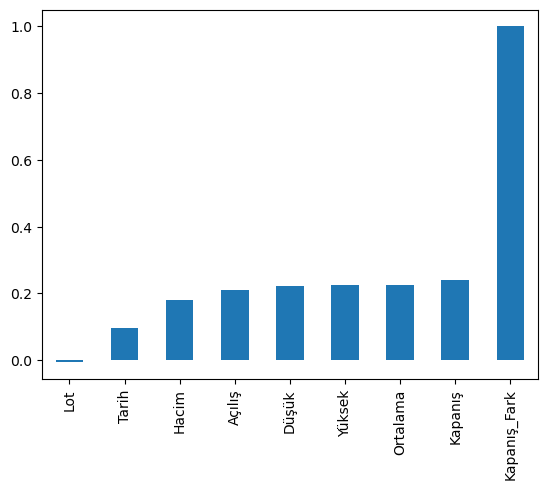

In [47]:
numeric_df.corr()["Kapanış_Fark"].sort_values().plot(kind="bar")

In [49]:
numeric_df.corr()["Kapanış_Fark"].sort_values()

Lot            -0.006814
Tarih           0.095708
Hacim           0.181897
Açılış          0.210405
Düşük           0.223714
Yüksek          0.226539
Ortalama        0.226771
Kapanış         0.240011
Kapanış_Fark    1.000000
Name: Kapanış_Fark, dtype: float64

In [51]:
# Özellikler ve hedef değişken
bagimsizdegiskenler = ['Tarih', 'Açılış' ,'Yüksek', 'Düşük', 'Ortalama', 'Hacim', 'Lot','Kapanış_Fark']# bu modelin ogrenmesi icin kullanılacak bagimsiz degiskenler
hedef = 'Kapanış'# hedef degiskeni, bu modelin tahmin etmeye calisacagi deger

x = garantiveriset[bagimsizdegiskenler].values
y = garantiveriset[hedef].values

# Eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [53]:
# degiskenlerin ve test lerin sayısını kontrol etme, verilerin %33 ü testlere gitti
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (2437, 8)
x_test shape: (1201, 8)
y_train shape: (2437,)
y_test shape: (1201,)


In [55]:
# MinMaxScaler kullanarak verileri 0-1 arasında ölçeklendirme
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [57]:
x_train

array([[0.48632334, 0.01767589, 0.01699407, ..., 0.08162173, 0.08449622,
        0.41219235],
       [0.01245048, 0.00326446, 0.00291103, ..., 0.00559896, 0.00995642,
        0.41688059],
       [0.2554235 , 0.02086074, 0.02423228, ..., 0.08477683, 0.07795304,
        0.50126686],
       ...,
       [0.14336918, 0.00740477, 0.0076316 , ..., 0.03075528, 0.04012366,
        0.42250627],
       [0.8768157 , 0.10175582, 0.10715702, ..., 0.17057986, 0.06382054,
        0.47876373],
       [0.35276363, 0.02523991, 0.02509772, ..., 0.09724977, 0.08672015,
        0.40375373]])

In [61]:
# Verilerin korelasyonunu kontrol etme
garantiveriset_corr = garantiveriset[bagimsizdegiskenler + [hedef]].corr()
print("Korelasyon Matris:")
print(garantiveriset_corr)

Korelasyon Matris:
                 Tarih    Açılış    Yüksek     Düşük  Ortalama     Hacim  \
Tarih         1.000000  0.556316  0.556679  0.556095  0.556425  0.610255   
Açılış        0.556316  1.000000  0.999736  0.999802  0.999790  0.417527   
Yüksek        0.556679  0.999736  1.000000  0.999752  0.999937  0.422945   
Düşük         0.556095  0.999802  0.999752  1.000000  0.999914  0.416476   
Ortalama      0.556425  0.999790  0.999937  0.999914  1.000000  0.420310   
Hacim         0.610255  0.417527  0.422945  0.416476  0.420310  1.000000   
Lot           0.235025 -0.179646 -0.177648 -0.180366 -0.178735  0.695538   
Kapanış_Fark  0.095708  0.210405  0.226539  0.223714  0.226771  0.181897   
Kapanış       0.555689  0.999463  0.999786  0.999771  0.999856  0.420290   

                   Lot  Kapanış_Fark   Kapanış  
Tarih         0.235025      0.095708  0.555689  
Açılış       -0.179646      0.210405  0.999463  
Yüksek       -0.177648      0.226539  0.999786  
Düşük        -0.180366  

In [63]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(8, activation='relu'),
    #Dropout(0.3),
    Dense(4, activation='relu'),
    #Dropout(0.2),
    Dense(4, activation='relu'),
    #Dropout(0.3),
    #Dense(7, activation='relu'),
    Dense(1)
])


In [65]:
model.compile(optimizer='adam', loss='mse')
#model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss',mode="min",verbose=1, patience=25)

In [67]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,validation_split=0.2,verbose=1,callbacks=[ early_stopping])

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 350.0299 - val_loss: 378.9429
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 395.8777 - val_loss: 358.8608
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 357.4034 - val_loss: 313.8952
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 302.3731 - val_loss: 245.1922
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 228.0172 - val_loss: 188.5627
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 172.2447 - val_loss: 160.2008
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 153.9728 - val_loss: 131.5574
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 122.9305 - val_loss: 93.4176
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 82.1016 - val_loss: 56.6158
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 43.6054 - val_loss: 30.0707
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 27.3945 - val_loss: 16.0470
Epoch 

In [69]:
kayipVerisi=pd.DataFrame(history.history)

In [71]:
kayipVerisi.head()

,loss,val_loss
0,373.041412,378.942932
1,361.205475,358.860840
2,330.407501,313.895233
3,273.087280,245.192230
4,208.237823,188.562698


<Axes: >

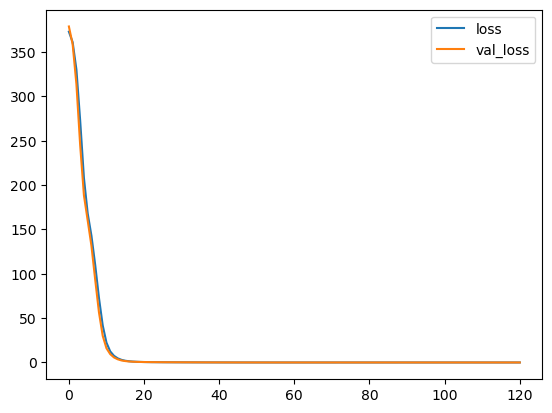

In [73]:
kayipVerisi.plot()

In [75]:
tahminDizisi = model.predict(x_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step


In [77]:
mean_absolute_error(y_test,tahminDizisi)

0.08263729223310101

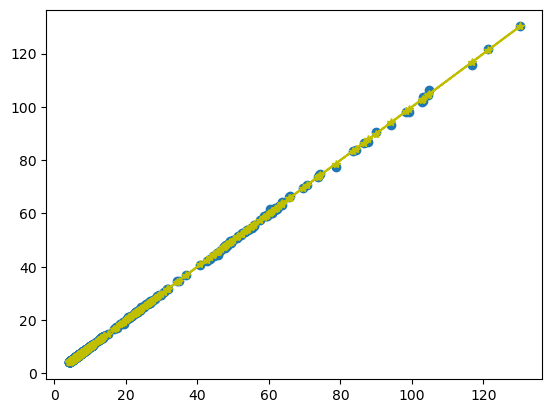

In [81]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"y-*")

In [83]:
# Model performansını değerlendirme (Mean Squared Error)
mse = mean_squared_error(y_test, tahminDizisi)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.024071819259703725


In [85]:
# Tahmin sonuçlarını ve gerçek değerleri karşılaştırma
results = pd.DataFrame({'Gerçek': y_test, 'Tahmin': tahminDizisi.flatten()})
print(results)#.head())

         Gerçek     Tahmin
0      6.044319   6.109488
1      4.839281   4.884242
2      7.689292   7.775500
3      9.056915   9.047701
4      5.671331   5.708341
...         ...        ...
1196   5.480055   5.509748
1197   6.226031   6.273353
1198   6.818986   6.820168
1199   7.899695   7.967891
1200  22.714010  22.995821

[1201 rows x 2 columns]


In [87]:
# MySQL veritabanı bağlantı dizesi
username = 'root'
password = 'Fidelio06'
host = '192.168.1.88'
database = 'seda_nilsu_veri_analizi'

In [89]:
# MySQL engine oluşturma
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}/{database}')

In [97]:
try:
    # Veritabanına bağlanın ve DataFrame'i SQL tablosuna yazın
    with engine.connect() as connection:
        # DataFrame'i SQL tablosuna yazma
        garantiveriset.to_sql('garantianaliz', con=connection, if_exists='replace', index=False)
        print("Veriler başarıyla tabloya aktarıldı.")

        # Verilerin başarıyla aktarıldığını doğrulama
        verification_query = text("SELECT COUNT(*) FROM garantianaliz;")
        result = connection.execute(verification_query)
        count = result.scalar()

        if count > 0:
            print(f"Tablo 'garantianaliz' içinde {count} veri var.")
        else:
            print("Tablo 'garantianaliz' içinde veri bulunamadı.")
        
except Exception as e:
    print(f"Bir hata oluştu: {e}")

Veriler başarıyla tabloya aktarıldı.
Tablo 'garantianaliz' içinde 3638 veri var.


In [98]:
with engine.connect() as connection:
   kayipVerisi.to_sql('garantikayıpverisi', con=connection, if_exists='replace', index=False)
   print("Veriler başarıyla tabloya aktarıldı.")

Veriler başarıyla tabloya aktarıldı.


In [99]:
with engine.connect() as connection:
   results.to_sql('garantisonuçlar', con=connection, if_exists='replace', index=False)
   print("Veriler başarıyla tabloya aktarıldı.")

Veriler başarıyla tabloya aktarıldı.
